# Jupyter and the Greeks; Number, Figure, Algorithm

As prelude, warm-up, and demonstration we recall the Euclidean Algorithm and Conics. A parallel goal is to develop intuitive reasoning along the lines set by Hilbert and Cohn-Vossen in **Geometry and the Imagination.**  In particular, we build a *live rapport* with the viewer by placing axes, and code, under their control. 

## The Euclidean Algorithm

Integer arithmetic offers no surprises regarding addition and subtraction. While multiplication can be seen as specified number of additions, division is an *unspecified* number of subtractions. For example, $3\cdot 4=4+4+4$, i.e., 4 three times, while to ask for $14/3$ in integers we repeatedly subtract 3 from 14 until the remainder is less than 3. That is
we seek an integer **quotient**, $q$, and an integer **remainder**, $0\le r<3$, such that $14=3q + r$. 

To accomplish this we recognize "repeatedly subtract 3 from 14 until the remainder is less than 3" as a recipe, procedure, or **algorithm** that we ought to be able to code. Perhaps the most difficult aspect of its implementation is flipping the English locution "until condition is true" to the python locution "while condition is false." Do you see how we accomplished this in the code cell below? Can you decode each line? If these lines do not have line numbers please click the *View* tab above and select *Toggle Line Numbers*.

In [65]:
# Euclid Division Algorithm, given n and d return q and r such that  
# n = dq + r  where r is as small as possible

def ediv(n,d):      # function that takes n and d and returns q and r
    r = n
    q = 0
    while r >= d:
        r = r - d
        q = q + 1
    return q, r

print(ediv(14,3))  # please change the 14 and 3 and run this cell again

(4, 2)


This states that 3 goes into 14 four times with a remainder of 2. 

\begin{exercise}\label{ex:negdiv}
This implementation fails when $n<0$. Can you explain how to fix it, assuming $0<d<|n|$? In particular, please state how lines 5 and 9 should be changed?
\end{exercise}

Your answer here.

The utility of this **algorithm** is difficult to overstate. Let's see how to use it to find the **greatest common divisor** of two integers, $a$ and $b$. We suppose $a>b$ and $a=qb+r$. Now if $c$ divides both $a$ and $b$ then it must divide $r$ and conversely, so gcd$(a,b)=$gcd$(b,r)$. We repeat this reduction step until $r=0$ at which point the gcd is $b$. For example, the gcd of 108 and 16 proceeds as

\begin{equation}\label{eq:gcdex}
\eqalign{
   108 &= 6\cdot 16 + 12 \cr
   16 &= 1\cdot 12 + 4 \cr
   12 &= 3\cdot 4 \cr}
\end{equation}

and so gcd(108,16)=4. As with the original division algorithm we code this in a while loop, here with repeated calls to ediv until the remainder vanishes.

In [66]:
# Euclid gcd, given   a>b

def egcd(a,b):
    while b>0:
        q, r = ediv(a,b)
        a = b
        b = r
    return a

print(egcd(108, 16))

4


In order to see how this code works we illustrate its path to the gcd in the code cell below.

We will now visualize the path taken in computing the gcd of a and b
a: 108
b: 28


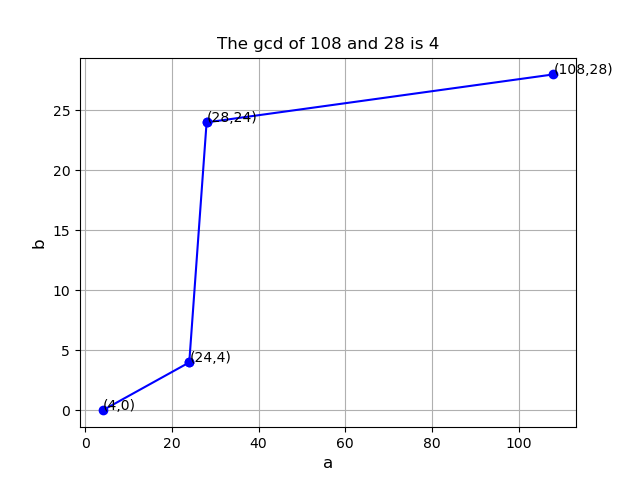

In [67]:
# deluxe Euclid gcd, now with graphics and formatted output
# note that the plt.text and plt.title line build phrases from pieces using
# what is called string concatenation, denoted by the simple plus sign   +
# here we move back and forth between numbers and characters by using the str and int functions

%matplotlib widget   
import matplotlib.pyplot as plt   # import the plot library as plt (the line above gives you control of the plot)

def degcd(a,b): 
    plt.text(a, b, "(" + str(a) + "," + str(b) + ")")   # mark the starting point
    while b>0:
        q, r = ediv(a,b)
        plt.plot([a,b], [b,r], 'bo-')                     # connect the dots
        plt.text(b, r, "(" + str(b) + "," + str(r) + ")")  # mark the next iterate
        a = b
        b = r
    return a

print('We will now visualize the path taken in computing the gcd of a and b')
a = input('a: ')    # ask user for a (read as a string not a as a number)
b = input('b: ')    # ask user for b

plt.figure(" ")
plt.title('The gcd of ' + a + ' and ' + b + ' is ' + str(degcd(int(a),int(b))))
plt.grid('on')                 # add grid and label axes
plt.xlabel('a', fontsize=12)
plt.ylabel('b', fontsize=12);

\begin{myfig}\label{fig:degcd} Illustration of the Euclidean path to the greatest common divisor of two numbers.
As you explore larger pairs you may have trouble seeing the endgame. With your mouse resting in the plot you should see a few plot tools at upper left, zoom and download being the most useful. Please give them both a try. \end{myfig}

By reversing the steps of the Euclidean Algorithm we learn that the gcd of $a$ and $b$ can be expressed as an integer sum of $a$ and $b$. For example, $4=16-12=16-(108-6\cdot 16)=7\cdot 16 - 1\cdot 108$. This is an instance of **Bezout's Lemma:** There exist integers $x$ and $y$ such that gcd$(a,b)=xa+yb$.

\begin{exercise}\label{ex:bez}
Please write gcd(69,15) as an integer sum of 69 and 15.
\end{exercise}

\begin{exercise}\label{ex:bezC}
Please expand our egcd code to return Bezout Coefficients, $x$ and $y$, along with gcd$(a,b)$.
\end{exercise}


## Conic Sections

Given two lines in $\maR^3$ that intersect at one point we rotate one about the other to achieve a cone. We explore in Figure \ref{fig:conicW} the intersection of a plane with such a cone. Their intersection is called a **conic section**. 

We see that, except for a few degenerate cases that conics are either parabolas, ellipses, or hyperbolas.

In [68]:
# conic widget

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

plt.ioff()
fig = plt.figure(' ') 
ax = plt.axes(projection="3d")    # set up for 3D work

# build the cone, parametrized as (r*cos(t), r*sin(t), mu*r)  and (r*cos(t), r*sin(t), -mu*r)
r = np.linspace(0,3,100)
t = np.linspace(0,2*np.pi,100)
R, T = np.meshgrid(r, t)   
mu = -2 # cone slope
Zc = mu*R
Xc = R*np.cos(T)
Yc = R*np.sin(T)
ax.plot_surface(Xc, Yc, Zc, alpha = 0.5, color='r') 
ax.plot_surface(Xc, Yc, -Zc, alpha = 0.5, color='r') 

# plot the intersecting plane 
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X, Y = np.meshgrid(x, y)
m = 0
b = -2
Z = b*np.ones(X.shape) + m*X  
ax.plot_surface(X, Y, Z, alpha = 0.25, color='b')

# find their intersection
#  z = mu*r on cone, while z = mx + b on plane, so mu*r = m*r*cos(t) + b (solve for r)
nr = b/(mu-m*np.cos(t))  
nr[abs(nr)>3] = np.nan  # only keep the parts which lie on the cone
conic = ax.plot(nr*np.cos(t), nr*np.sin(t), mu*nr, 'k')

ax.set(xlim=(-3,3), ylim=(-3,3), zlim=(-3,3))
ax.axis('off')

# let the user vary the plane slope, m
mS = widgets.FloatSlider(min=-3, max=3, step=0.1, value=0)   

def update(m = mS): 
    
    ax.clear()   # going brute force as plot_surface is not iterable
    ax.plot_surface(Xc, Yc, Zc, alpha = 0.5, color='r') 
    ax.plot_surface(Xc, Yc, -Zc, alpha = 0.5, color='r') 
    Z = b*np.ones(X.shape) + m*X  
    ax.plot_surface(X, Y, Z, alpha = 0.25, color='b')

    nr = b/(mu-m*np.cos(t)) 
    nr[abs(nr)>3] = np.nan
    ax.plot(nr*np.cos(t), nr*np.sin(t), mu*nr, 'k')
    
    ax.set(xlim=(-3,3), ylim=(-3,3), zlim=(-3,3))
    ax.axis('off')
    fig.canvas.draw_idle()

widgets.interactive(update)
layoutS = widgets.Layout(display='flex', flex_flow='column', justify_content='center')
controls = widgets.VBox([mS], layout = layoutS)
widgets.HBox([fig.canvas, controls])

\begin{myfig}\label{fig:conicW} Where the blue plane intersects the red cone we find a black conic section. The blue plane is $z=mx+b$ with $b=-2$ and the slope $m$ chosen by the slider. The fixed red cone is the rotation of the line $z=\mu x,y=0$, with $\mu=-2$, about the $z$-axis. \end{myfig}

In order to establish this we need to agree on definitions of the basic objects. We start in the plane without coordinates. We fix two points $F_1$ and $F_2$, enclose them in a loop of thread of length $L$, stretch the loop tight with a pencil at point $P$ and note that $\|F_1-P\|+\|F_2-P\|+\|F_1-F_2\|=L$. As $L$ and the two foci are fixed, we learn that

\begin{equation}\label{eq:ellip}
  \|F_1-P\|+\|F_2-P\| = \hbox{constant}
\end{equation}

and **define** an ellipse to be curve whose points obey (\ref{eq:ellip}). On reversing the sign,

\begin{equation}\label{eq:hyp}
  \|F_1-P\|-\|F_2-P\| = \hbox{constant}
\end{equation}

we **define** a hyperbola to be curve whose points obey (\ref{eq:hyp}). 


### Ellipses

To prepare for the slicing of a space cone by a plane tangent to 2 spheres we warm up with the slicing of a planar cone by a line tangent to two circles.

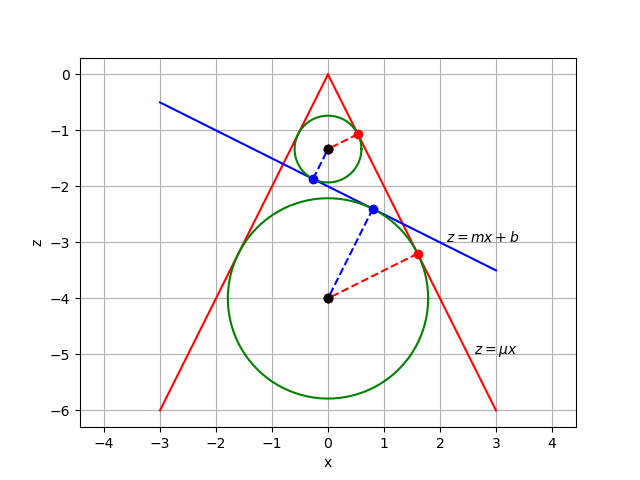

In [69]:
# plane prep for ellipse

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ') # ,figsize=(6,6))

# build the lower "cone"
x = np.linspace(0,3,100)
mu = -2
plt.plot(x, mu*x, 'r') 
plt.plot(-x, mu*x, 'r') 
plt.text(2.6,-5,'$z=\mu x$')

# plot the intersecting line
x = np.linspace(-3,3,100)
m = -0.5
b = -2
plt.plot(x, m*x + b, color='b')
plt.text(2.1,-3,'$z=mx+b$')

s = 1/(1+m**2)
sig = 1/(1+mu**2)

beta = (b*s + np.sqrt(b**2*s*sig))/(s-sig)
d = abs(beta)*np.sqrt(sig)
t = np.linspace(0, 2*np.pi, 100)
plt.plot(d*np.cos(t),d*np.sin(t)+beta,'g')
xb = (beta-b)*m*s
zb = m*xb + b
plt.plot([xb, 0],[zb, beta], 'ob--')
xr = beta*mu*sig
zr = mu*xr
plt.plot([xr, 0],[zr, beta], 'or--')
plt.plot(0, beta, 'ko')

beta = (b*s - np.sqrt(b**2*s*sig))/(s-sig)
d = abs(beta)*np.sqrt(sig)
t = np.linspace(0, 2*np.pi, 100)
plt.plot(d*np.cos(t),d*np.sin(t)+beta,'g')
xb = (beta-b)*m*s
zb = m*xb + b
plt.plot([xb, 0],[zb, beta], 'ob--')
xr = beta*mu*sig
zr = mu*xr
plt.plot([xr, 0],[zr, beta], 'or--')
plt.plot(0, beta, 'ko')

plt.axis('equal')
plt.grid('on')
plt.xlabel('x')
plt.ylabel('z');

\begin{myfig}\label{fig:cone2} Given the red line, $z=\mu x$, and blue line, $z=mx+b$, we construct two circles, centered on the $z$-axis and tangent to both lines.\end{myfig}

To achieve the circles in Figure \ref{fig:cone2} we first ask for a line perpendicular to $z=mx+b$ to intersect a line perpendicular to $z=\mu x$ on the $z$-axis. For $z=-x/m+c$ to meet $z=-x/\mu+\beta$ when $x=0$ requires $c=\beta$ and so the blue dashed line meets the red dashed line at $(0,\beta)$, marked with a black dot. We determine $\beta$ by equating the lengths of these two segments. The dashed blue line meets the solid blue line at the blue dot at

\begin{equation}\label{eq:bdot}
  x_b = m(\beta-b)/(1+m^2), \hskip 0.25in z_b=mx_b+b
\end{equation}

and so the square of the length of the dashed blue line is $(\beta-b)^2/(1+m^2)$. Similarly, the dashed red line meets the solid red line at the red dot at

\begin{equation}\label{eq:rdot}
  x_r = \mu\beta/(1+\mu^2), \hskip 0.25in z_r=\mu x_r
\end{equation}

and so the square of the length of the dashed red line is $\beta^2/(1+\mu^2)$. Equating these two squared lengths yields a quadratic equation for $\beta$ with the two roots

\begin{equation}\label{eq:betaC}
  \beta = \frac{bs\pm\sqrt{b^2s\s}}{s-\s}, \where s = \frac{1}{1+m^2} \and \s = \frac{1}{1+\mu^2}
\end{equation}

and the resulting length of each dashed line is $d=|\beta|/\sqrt\s$. With these two centers and radii we can now draw the two green circles in Figure \ref{fig:cone2}.

With this planar preliminary we may now construct the associated spheres tangent to the cone and the slicing plane.

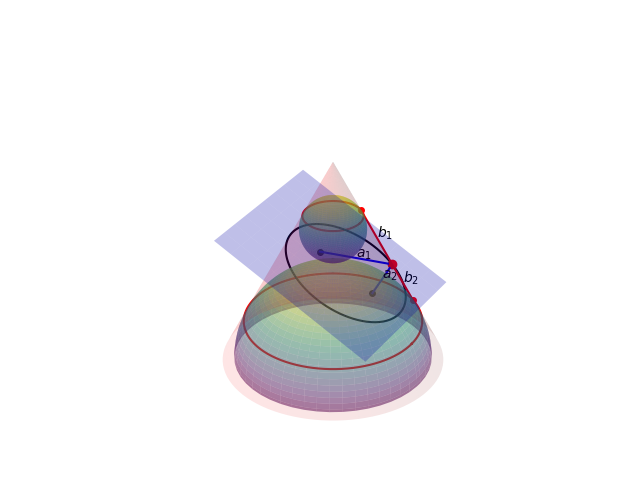

In [70]:
# set up ellipse argument in 3d

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

# build the lower cone, parametrized as (r*cos(t), r*sin(t), mu*r)
r = np.linspace(0,2,100)
t = np.linspace(0,2*np.pi,100)
R, T = np.meshgrid(r, t) 
mu = -2
Zc = mu*R
Xc = R*np.cos(T)
Yc = R*np.sin(T)
ax.plot_surface(Xc, Yc, Zc, alpha = 0.1, color='r') 

# plot the intersecting plane 
x = np.linspace(-3/2,3/2,10)
y = np.linspace(-3/2,3/2,10)
X, Y = np.meshgrid(x, y)
m = -0.5
b = -2
Z = b*np.ones(X.shape) + m*X 
ax.plot_surface(X, Y, Z, alpha = 0.25, color='b')

s = 1/(1+m**2)                 # key parameters of our two lines
sig = 1/(1+mu**2)

# build the upper sphere
beta1 = (b*s + np.sqrt(b**2*s*sig))/(s-sig)
d1 = abs(beta1)*np.sqrt(sig)

u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
xs = d1 * np.outer(np.cos(u), np.sin(v))
ys = d1 * np.outer(np.sin(u), np.sin(v)) 
zs = d1 * np.outer(np.ones(np.size(u)), np.cos(v)) + beta1
ax.plot_surface(xs, ys, zs, alpha = 0.5, cmap='viridis')

xb1 = m*s*(beta1-b)
zb1 = m*xb1 + b
ax.plot3D(xb1,0,zb1,'ko',markersize=4)   # F1

xr1 = beta1*mu*sig
ax.plot3D(xr1*np.cos(t),xr1*np.sin(t), mu*xr1*np.ones(100),'r')

# build the lower sphere
beta2 = (b*s - np.sqrt(b**2*s*sig))/(s-sig)
d2 = abs(beta2)*np.sqrt(sig)

xs = d2 * np.outer(np.cos(u), np.sin(v))
ys = d2 * np.outer(np.sin(u), np.sin(v)) 
zs = d2 * np.outer(np.ones(np.size(u)), np.cos(v)) + beta2
zs[abs(zs)>4] = np.nan
ax.plot_surface(xs, ys, zs, alpha = 0.5, cmap='viridis')

xb2 = m*s*(beta2-b)
zb2 = m*xb2 + b
ax.plot3D(xb2,0,zb2,'ko',markersize=4)   # F1

xr2 = beta2*mu*sig
ax.plot3D(xr2*np.cos(t),xr2*np.sin(t), mu*xr2*np.ones(100),'r')

# find their intersection
#  z = mu*r on cone, while z = mx + b on plane, so mu*r = m*r*cos(t) + b (solve for r)
nr = b/(mu-m*np.cos(t))  
nr[abs(nr)>3] = np.nan  # only keep the parts which lie on the cone
conic = ax.plot(nr*np.cos(t), nr*np.sin(t), mu*nr, 'k')

B = 15 # the index of a point on the ellipse chosen for good visibility
Bx = nr[B]*np.cos(t[B])
By = nr[B]*np.sin(t[B])
Bz = mu*nr[B]
ax.plot(Bx, By, Bz, 'ro',markersize=6)   # B
ax.plot([Bx,xb1], [By,0], [Bz,zb1], 'b')   # B to F1
ax.text3D((Bx+xb1)/2, By/2 ,(Bz+zb1)/2, '$a_1$')
ax.plot([Bx,xb2], [By,0], [Bz,zb2], 'b')   # B to F2
ax.text3D((Bx+xb2)/2, By/2 ,(Bz+zb2)/2, '$a_2$')

ax.plot3D([Bx,xr1*np.cos(t[B])],[By,xr1*np.sin(t[B])],[Bz,xr1*mu],'ro-',markersize=4)
ax.text3D((Bx+xr1*np.cos(t[B]))/2, (By+xr1*np.sin(t[B]))/2, (Bz+xr1*mu)/2, '$b_1$')

ax.plot3D([Bx,xr2*np.cos(t[B])],[By,xr2*np.sin(t[B])],[Bz,xr2*mu],'ro-',markersize=4)
ax.text3D((Bx+xr2*np.cos(t[B]))/2, (By+xr2*np.sin(t[B]))/2, (Bz+xr2*mu)/2, '$b_2$')

ax.set(xlim=(-2,2), ylim=(-2,2), zlim=(-3,0))
ax.axis('off');

\begin{myfig}\label{fig:ellipseVis} Each sphere is tangent to the cone and tangent to the slicing plane. We have marked the tangent points with the plane by black dots. We now argue that these are foci of the conic.
We mark an arbitrary large red point on the conic and denote by $a_1$ and $a_2$ its distance to the two putative foci. As each blue segment is tangent to its respective sphere it must have the same length as any other tangent through the red dot. In particular, the red segment of the cone through the red dot has subsegments of length $b_1$ and $b_2$, with $a_1=b_1$ and $a_2=b_2$. As $b_1+b_2$ is just the constant distance between the two red rings we find that $a_1+a_2$ must also be constant as the red dot traverses the conic. This settles the claim that our conic is an ellipse.\end{myfig}

### Hyperbolas

To prepare for the slicing of a space cone by a plane tangent to 2 spheres we warm up with the slicing of a planar cone by a line tangent to two circles.

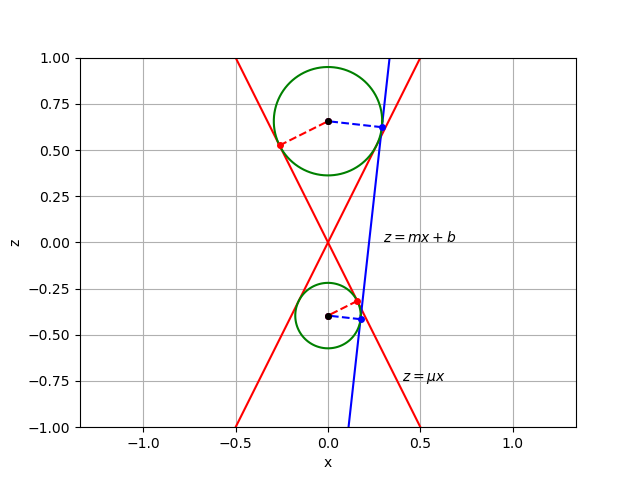

In [37]:
# plane prep for hyperbola

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ') 

# build the lower "cone"
x = np.linspace(-3,3,100)
mu = -2
plt.plot(x, mu*x, 'r') 
plt.plot(x, -mu*x, 'r') 
plt.text(0.4,-0.75,'$z=\mu x$')

# plot the intersecting line
x = np.linspace(-3,3,100)
m = 9
b = -2
plt.plot(x, m*x + b, color='b')
plt.text(0.3,0,'$z=mx+b$')

s = 1/(1+m**2)
sig = 1/(1+mu**2)

beta = (b*s + np.sqrt(b**2*s*sig))/(s-sig)
d = abs(beta)*np.sqrt(sig)
t = np.linspace(0, 2*np.pi, 100)
plt.plot(d*np.cos(t),d*np.sin(t)+beta,'g')
xb = (beta-b)*m*s
zb = m*xb + b
plt.plot([xb, 0],[zb, beta], 'ob--', markersize=4)
xr = beta*mu*sig
zr = mu*xr
plt.plot([xr, 0],[zr, beta], 'or--', markersize=4)
plt.plot(0, beta, 'ko', markersize=4)

beta = (b*s - np.sqrt(b**2*s*sig))/(s-sig)
d = abs(beta)*np.sqrt(sig)
t = np.linspace(0, 2*np.pi, 100)
plt.plot(d*np.cos(t),d*np.sin(t)+beta,'g')
xb = (beta-b)*m*s
zb = m*xb + b
plt.plot([xb, 0],[zb, beta], 'ob--', markersize=4)
xr = beta*mu*sig
zr = mu*xr
plt.plot([xr, 0],[zr, beta], 'or--', markersize=4)
plt.plot(0, beta, 'ko', markersize=4)

plt.axis('equal')
plt.axis([-1,1,-1,1])
plt.grid('on')
plt.xlabel('x')
plt.ylabel('z');

\begin{myfig}\label{fig:hypprep} Given the red line, $z=\mu x$, and blue line, $z=mx+b$, we construct two circles, centered on the $z$-axis and tangent to both lines. \end{myfig}

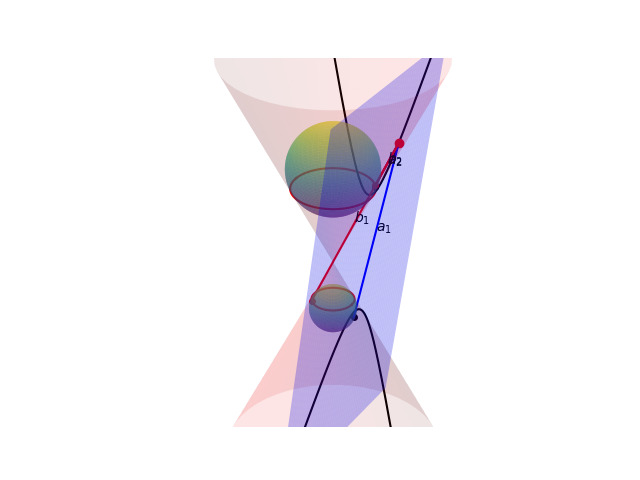

In [64]:
# set up hyperbola argument in 3d

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

# build the cone, parametrized as (r*cos(t), r*sin(t), (+/-)mu*r)
r = np.linspace(0,2,100)
t = np.linspace(0,2*np.pi,100)
R, T = np.meshgrid(r, t) 
mu = -2
Zc = mu*R
Zc[abs(Zc)>2] = np.nan
Xc = R*np.cos(T)
Yc = R*np.sin(T)
ax.plot_surface(Xc, Yc, Zc, alpha = 0.1, color='r') 
ax.plot_surface(Xc, Yc, -Zc, alpha = 0.1, color='r') 

# plot the intersecting plane 
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, y)
m = 7
b = -2
Z = b*np.ones(X.shape) + m*X 
Z[abs(Z)>2] = np.nan
ax.plot_surface(X, Y, Z, alpha = 0.25, color='b')

s = 1/(1+m**2)                 # key parameters of our two lines
sig = 1/(1+mu**2)

# build the upper sphere
beta1 = (b*s + np.sqrt(b**2*s*sig))/(s-sig)
d1 = abs(beta1)*np.sqrt(sig)

u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
xs = d1 * np.outer(np.cos(u), np.sin(v))
ys = d1 * np.outer(np.sin(u), np.sin(v)) 
zs = d1 * np.outer(np.ones(np.size(u)), np.cos(v)) + beta1
ax.plot_surface(xs, ys, zs, alpha = 0.5, cmap='viridis')

xb1 = m*s*(beta1-b)
zb1 = m*xb1 + b
ax.plot3D(xb1,0,zb1,'ko',markersize=4)   # F1

xr1 = beta1*mu*sig
ax.plot3D(xr1*np.cos(t),xr1*np.sin(t), mu*xr1*np.ones(100),'r')

# build the lower sphere
beta2 = (b*s - np.sqrt(b**2*s*sig))/(s-sig)
d2 = abs(beta2)*np.sqrt(sig)

xs = d2 * np.outer(np.cos(u), np.sin(v))
ys = d2 * np.outer(np.sin(u), np.sin(v)) 
zs = d2 * np.outer(np.ones(np.size(u)), np.cos(v)) + beta2
zs[abs(zs)>2] = np.nan
ax.plot_surface(xs, ys, zs, alpha = 0.5, cmap='viridis')

xb2 = m*s*(beta2-b)
zb2 = m*xb2 + b
ax.plot3D(xb2,0,zb2,'ko',markersize=4)   # F1

xr2 = beta2*mu*sig
ax.plot3D(xr2*np.cos(t),xr2*np.sin(t), mu*xr2*np.ones(100),'r')

# find their intersection
#  z = mu*r on cone, while z = mx + b on plane, so mu*r = m*r*cos(t) + b (solve for r)
nr = b/(mu-m*np.cos(t))  
nr[abs(nr)>2] = np.nan  # only keep the parts which lie on the cone
conic = ax.plot(nr*np.cos(t), nr*np.sin(t), mu*nr, 'k')

B = 60 # the index of a point on the ellipse chosen for good visibility
Bx = nr[B]*np.cos(t[B])
By = nr[B]*np.sin(t[B])
Bz = mu*nr[B]
ax.plot(Bx, By, Bz, 'ro',markersize=6)   # B
ax.plot([Bx,xb1], [By,0], [Bz,zb1], 'b')   # B to F1
ax.text3D((Bx+xb1)/2, By/2 ,(Bz+zb1)/2, '$a_1$')
ax.plot([Bx,xb2], [By,0], [Bz,zb2], 'b')   # B to F2
ax.text3D((Bx+xb2)/2, By/2 ,(Bz+zb2)/2, '$a_2$')

ax.plot3D([Bx,xr1*np.cos(t[B])],[By,xr1*np.sin(t[B])],[Bz,xr1*mu],'ro-',markersize=4)
ax.text3D((Bx+xr1*np.cos(t[B]))/2, (By+xr1*np.sin(t[B]))/2, (Bz+xr1*mu)/2, '$b_1$')

ax.plot3D([Bx,xr2*np.cos(t[B])],[By,xr2*np.sin(t[B])],[Bz,xr2*mu],'ro-',markersize=4)
ax.text3D((Bx+xr2*np.cos(t[B]))/2, (By+xr2*np.sin(t[B]))/2, (Bz+xr2*mu)/2, '$b_2$')

ax.set(xlim=(-1,1), ylim=(-1,1), zlim=(-0.5,1))
ax.axis('off');

\begin{myfig}\label{fig:hyperbolaVis} Each sphere is tangent to the cone and tangent to the slicing plane. We have marked the tangent points with the plane by black dots. We now argue that these are foci of the conic.
We mark an arbitrary large red point on the conic and denote by $a_1$ and $a_2$ its distance to the two putative foci. As each blue segment is tangent to its respective sphere it must have the same length as any other tangent through the large red dot. In particular, the red segment of the cone through the red dot has subsegments of length $b_1$ and $b_2$, with $a_1=b_1+b_2$ and $a_2=b_2$. As $b_1$ is just the constant distance between the two red rings we find that $a_1-a_2$ must also be constant as the red dot traverses the conic. This settles the claim that our conic is a hyperbola.\end{myfig}

### Parabolas

Back to the ellipse, we keep $F_1$ fixed, and we arrive at two familiar curves as we move $F_2$ to its extremes. In the easy case, as $F_2$ approaches $F_1$ we arrive at the circle, $\|F_1-P\|=\hbox{constant}$. In the other extreme we let $F_2\to\infty$ along the line through the foci.

We can argue more "geometrically" following Boyer...






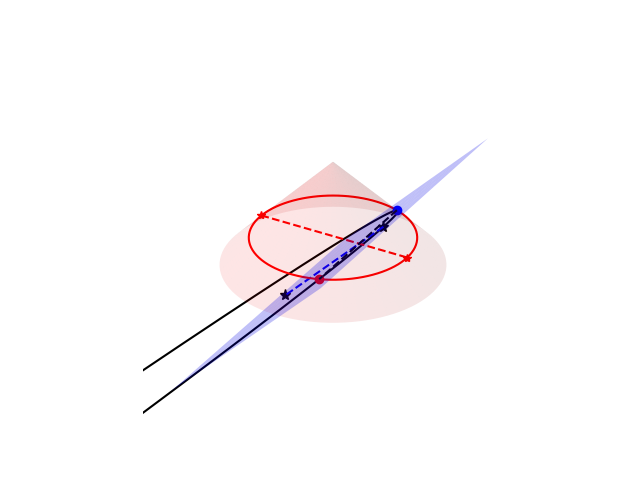

In [120]:
# set up parabola argument in 3d

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

# build the lower cone, parametrized as (r*cos(t), r*sin(t), mu*r)
r = np.linspace(0,2,100)
t = np.linspace(0,2*np.pi,100)
R, T = np.meshgrid(r, t) 
mu = -1
Zc = mu*R
Xc = R*np.cos(T)
Yc = R*np.sin(T)
ax.plot_surface(Xc, Yc, Zc, alpha = 0.1, color='r') 

# plot the intersecting plane 
x = np.linspace(-3/2,3/2,10)
y = np.linspace(-3,3,10)
X, Y = np.meshgrid(x, y)
m = 1
b = -2
Z = b*np.ones(X.shape) + m*X 
ax.plot_surface(X, Y, Z, alpha = 0.25, color='b')

s = 1/(1+m**2)                 # key parameters of our two lines
sig = 1/(1+mu**2)

# find their intersection
#  z = mu*r on cone, while z = mx + b on plane, so mu*r = m*r*cos(t) + b (solve for r)
nr = b/(mu-m*np.cos(t))  

conic = ax.plot(nr*np.cos(t), nr*np.sin(t), mu*nr, 'k')
#vind = np.argmax(mu*nr)
#nr[abs(nr)>1] = np.nan  # only keep the parts which lie on the cone
ax.plot(nr[0], 0, mu*nr[0], 'k*', markersize=8)
ax.plot(nr[0]-2, 0, mu*(nr[0]+2), 'k*', markersize=8)
ax.plot([nr[0], nr[0]-2], [0,0], [mu*nr[0],mu*(nr[0]+2)] , 'b--')


B = 80 # the index of a point on the ellipse chosen for good visibility
Bx = nr[B]*np.cos(t[B])
By = nr[B]*np.sin(t[B])
rad = np.sqrt(Bx**2+By**2)
Bz = mu*nr[B]
ax.plot(Bx, By, Bz, 'ro',markersize=6)
ax.plot(rad*np.cos(t), rad*np.sin(t), Bz*np.ones(100,), 'r')   # circ at B
ax.plot(rad, 0, Bz, 'r*',markersize=6)   # circ at B
ax.plot(-rad, 0, Bz, 'r*',markersize=6)   
ax.plot([-rad, rad], [0, 0], [Bz, Bz], 'r--')   


Bb = 19 # the index of a point on the ellipse chosen for good visibility
Bxb = nr[Bb]*np.cos(t[Bb])
Byb = nr[Bb]*np.sin(t[Bb])
Bzb = mu*nr[Bb]
ax.plot(Bxb, Byb, Bzb, 'bo',markersize=6)
ax.plot([Bxb, Bx], [Byb, By], [Bzb, Bz], 'k--',markersize=6)



'''
ax.plot([Bx,xb1], [By,0], [Bz,zb1], 'b')   # B to F1
ax.text3D((Bx+xb1)/2, By/2 ,(Bz+zb1)/2, '$a_1$')
ax.plot([Bx,xb2], [By,0], [Bz,zb2], 'b')   # B to F2
ax.text3D((Bx+xb2)/2, By/2 ,(Bz+zb2)/2, '$a_2$')

ax.plot3D([Bx,xr1*np.cos(t[B])],[By,xr1*np.sin(t[B])],[Bz,xr1*mu],'ro-',markersize=4)
ax.text3D((Bx+xr1*np.cos(t[B]))/2, (By+xr1*np.sin(t[B]))/2, (Bz+xr1*mu)/2, '$b_1$')

ax.plot3D([Bx,xr2*np.cos(t[B])],[By,xr2*np.sin(t[B])],[Bz,xr2*mu],'ro-',markersize=4)
ax.text3D((Bx+xr2*np.cos(t[B]))/2, (By+xr2*np.sin(t[B]))/2, (Bz+xr2*mu)/2, '$b_2$')
'''
ax.set(xlim=(-2,2), ylim=(-2,2), zlim=(-3,0))
ax.axis('off');